<a href="https://colab.research.google.com/github/2203a5200/deep-learning/blob/main/2203A52002_DIABITES_PREDICTION_DAUP_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Preview the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<Figure size 1200x600 with 0 Axes>

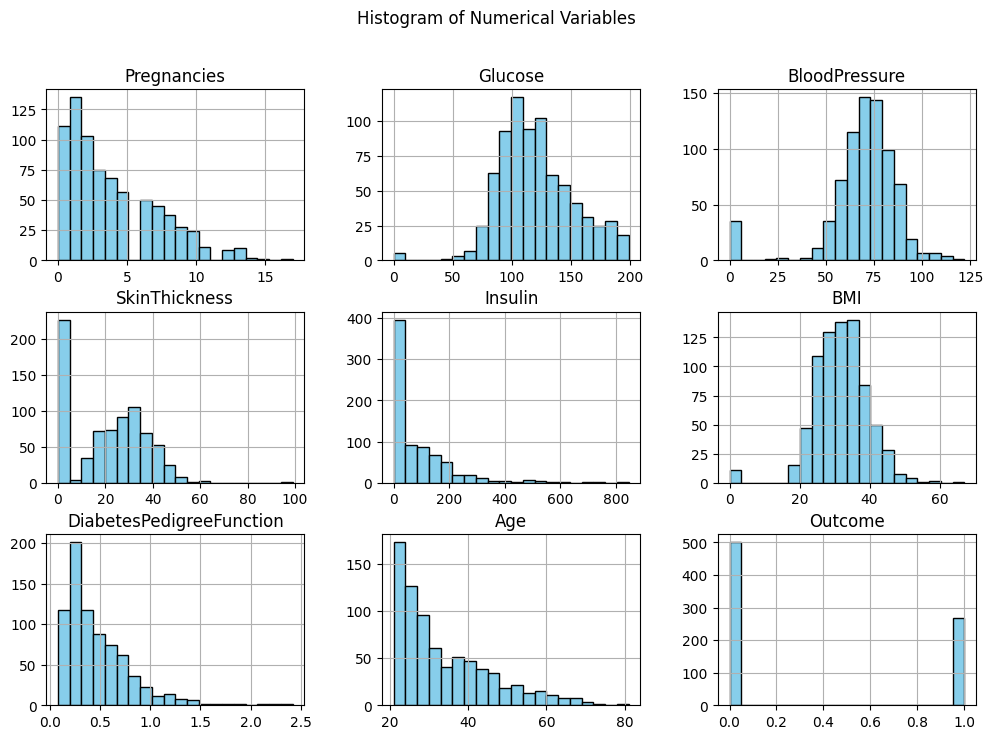

In [ ]:
# Histogram of all numerical features
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Numerical Variables')
plt.show()

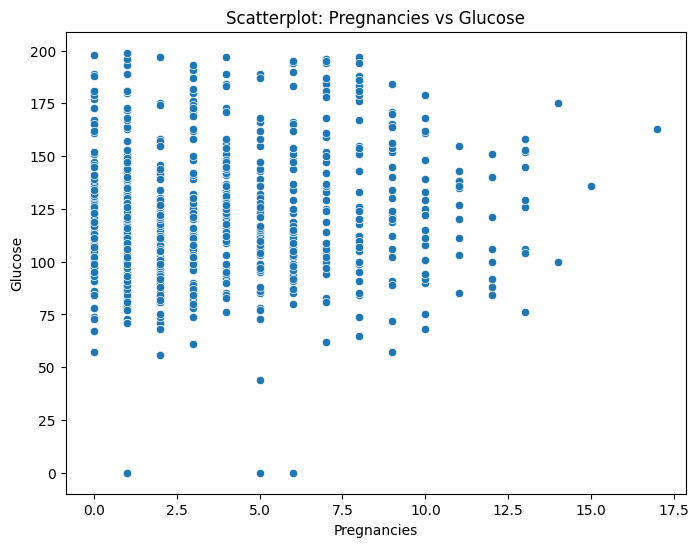

In [ ]:
# Scatterplot between first two numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1])
plt.title(f'Scatterplot: {df.columns[0]} vs {df.columns[1]}')
plt.show()

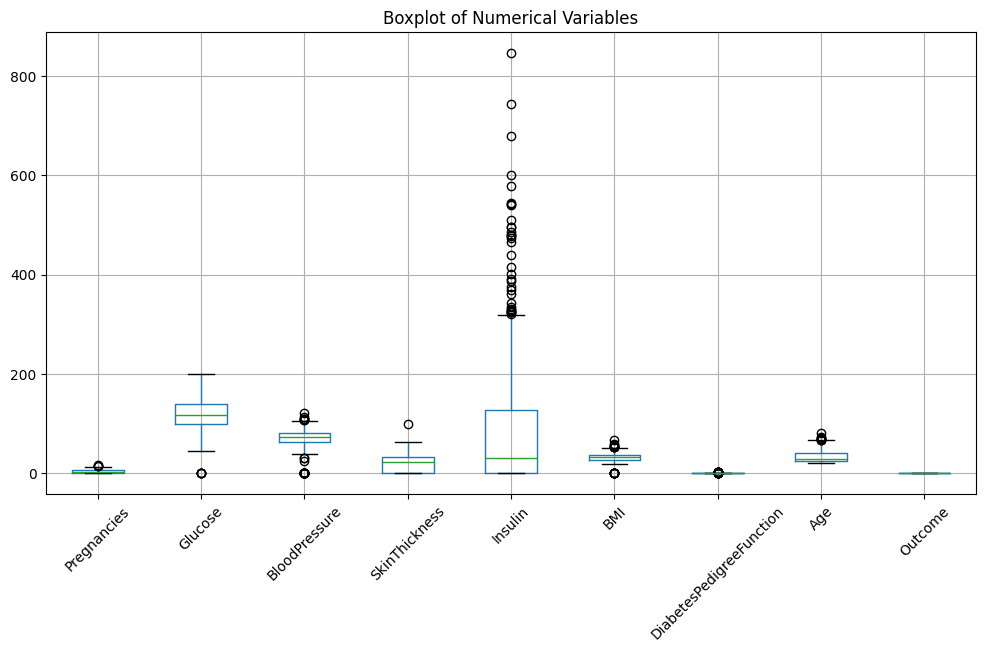

In [ ]:
# Boxplot for all numerical variables
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Skewness and Kurtosis
print("Skewness and Kurtosis:")
skew_kurt = pd.DataFrame({
    "Skewness": df.skew(),
    "Kurtosis": df.kurt()
})
print(skew_kurt)

Skewness and Kurtosis:
                          Skewness  Kurtosis
Pregnancies               0.901674  0.159220
Glucose                   0.173754  0.640780
BloodPressure            -1.843608  5.180157
SkinThickness             0.109372 -0.520072
Insulin                   2.272251  7.214260
BMI                      -0.428982  3.290443
DiabetesPedigreeFunction  1.919911  5.594954
Age                       1.129597  0.643159
Outcome                   0.635017 -1.600930


In [ ]:
# Splitting the dataset into features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Set:")
print(X_train.shape, y_train.shape)
print("\nTesting Set:")
print(X_test.shape, y_test.shape)


Training Set:
(614, 8) (614,)

Testing Set:
(154, 8) (154,)


In [ ]:
# --- Model 1: Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))

# --- Model 2: Decision Tree ---
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print("Classification Report:\n", classification_report(y_test, tree_pred))

# --- Model 3: Random Forest ---
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))



Logistic Regression Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Decision Tree Accuracy: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154


Random Forest Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63    